# Minimizacion

In [126]:
# Importamos las librerias que se utilizaran
import numpy as np
import emcee
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import random
import scipy.optimize as op
import corner
import matplotlib
plt.style.use('classic')
import pymultinest


ERROR:   Could not load MultiNest library "libmultinest.so"
ERROR:   You have to build it first,
ERROR:   and point the LD_LIBRARY_PATH environment variable to it!
ERROR:   manual: http://johannesbuchner.github.com/PyMultiNest/install.html


ERROR:   Could not load MultiNest library: libmultinest.so
ERROR:   You have to build MultiNest,
ERROR:   and point the LD_LIBRARY_PATH environment variable to it!
ERROR:   manual: http://johannesbuchner.github.com/PyMultiNest/install.html

problem: libmultinest.so: cannot open shared object file: No such file or directory


SystemExit: 1

/home/luiscantero/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [36]:
op.minimize?

In [15]:
data_line = np.load('fit_ejercise.npy')

Se grafican los datos

<ErrorbarContainer object of 3 artists>

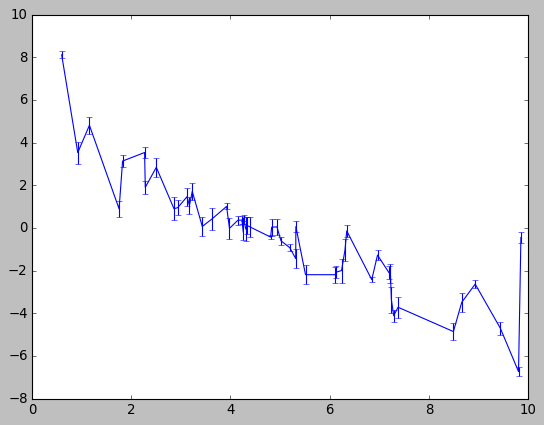

In [10]:
plt.errorbar(data[0], data[1], yerr = data[2])

In [77]:
def line(m, b, x):
    return m * x + b

def chisq(theta, data):
    m = theta[0]
    b = theta[1]
    f2 = np.exp(2 * theta[2])
    model = line(m, b, data[0])
    sigma2 = (data[2]**2 + f2 * model**2) #inverso de la varianza
    chisq = np.sum((model - data[1]) ** 2 / sigma2 + np.log(sigma2))
    return chisq

In [103]:
chisq([-1,4,np.log(0.1)], data_line)

455.6402926097669

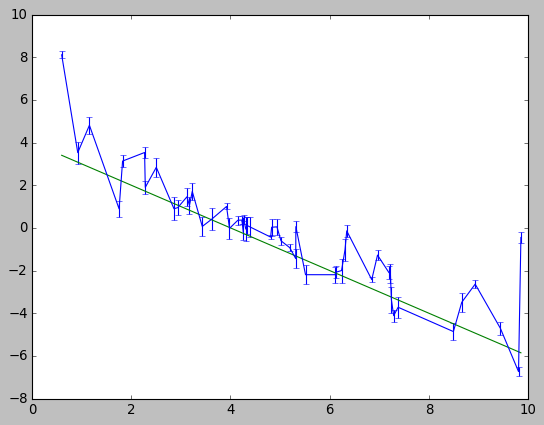

In [80]:
plt.errorbar(data[0], data[1], yerr = data[2])
plt.plot(data[0], line(-1,4,data[0]))

In [100]:
ini_point = [-1,4,np.log(0.1)]
chisq_ = lambda *args: chisq(*args)
min_sol = op.minimize(chisq, ini_point, args = data_line, method = 'L-BFGS-B',bounds=((-10, 10),(0,10),(-6,0)))

In [101]:
min_sol

      fun: 24.36482789614178
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00055884, 0.00014353, 0.00015206])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 88
      nit: 18
   status: 0
  success: True
        x: array([-1.00300843,  4.52831413, -0.79043901])

In [109]:
def crearregion(x, ncaminadores, delta):
    h = np.random.rand(ncaminadores, 1)
    xx = h * x
    return xx

In [125]:
crearregion(min_sol.x[0], 8, 1)

array([[-0.91277611],
       [-0.83494322],
       [-0.36858141],
       [-0.64992815],
       [-0.21011998],
       [-0.48409516],
       [-0.41876455],
       [-0.47544779]])

In [121]:
np.random.rand(3, 1)

array([[0.88181131],
       [0.83246706],
       [0.38192718]])

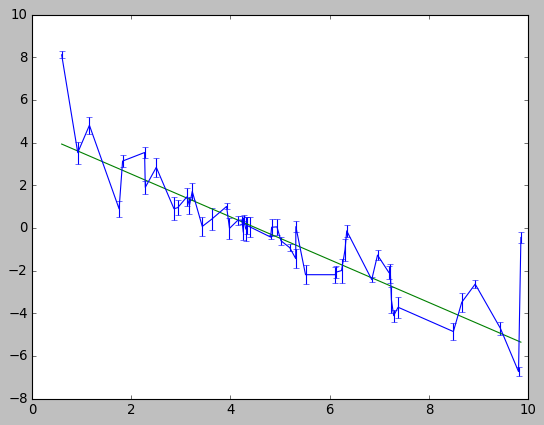

In [102]:
plt.errorbar(data[0], data[1], yerr = data[2])
plt.plot(data[0], line(min_sol.x[0], min_sol.x[1], data[0]))